## 导入包

In [7]:
import numpy as np

## 定义模型结构

In [8]:
def relu(x):
    return np.maximum(0, x)
class Model():
    def __init__(self, input_size=1, hidden_size1=100, hidden_size2=100, output_size=1) -> None:
        self.W1 = np.random.randn(input_size, hidden_size1)
        self.b1 = np.zeros(hidden_size1)
        self.W2 = np.random.randn(hidden_size1, hidden_size2)
        self.b2 = np.zeros(hidden_size2)
        self.W3 = np.random.randn(hidden_size2, output_size)
        self.b3 = np.zeros(output_size)
    def forward(self, x):
        self.input = x
        self.h1 = np.dot(x, self.W1)+self.b1
        self.r1 = relu(self.h1)
        self.h2 = np.dot(self.r1, self.W2)+self.b2
        self.r2 = relu(self.h2)
        self.o1 = np.dot(self.r2, self.W3)+self.b3
        return self.o1
    def backward(self, grad_y, lr=1e-5):
        # layer 3
        grad_W3 = np.dot(self.r2.T, grad_y)
        grad_b3 = np.sum(grad_y, axis=0)
        grad_h2 = np.dot(grad_y, self.W3.T) # for relu 2
        # relu 2
        grad_h2[self.h2<=0] = 0
        # layer 2
        grad_W2 = np.dot(self.r1.T, grad_h2)
        grad_b2 = np.sum(grad_h2, axis=0)
        grad_h1 = np.dot(grad_h2, self.W2.T)
        # relu 1
        grad_h1[self.h1<=0] = 0
        # layer 1
        grad_W1 = np.dot(self.input.T, grad_h1)
        grad_b1 = np.sum(grad_h1, axis=0)
        # gradient descent
        self.W1 -= lr * grad_W1
        self.b1 -= lr * grad_b1
        self.W2 -= lr * grad_W2
        self.b2 -= lr * grad_b2
        self.W3 -= lr * grad_W3
        self.b3 -= lr * grad_b3

model = Model()

## 定义训练过程

In [9]:
def train_one_step(model: Model, x, y, lr=1e-5):
    y_pred = model.forward(x)
    loss = np.mean(.5*(y-y_pred)**2)
    grad_y = y_pred-y
    model.backward(grad_y, lr)
    return loss
def test(model: Model, x, y):
    y_pred = model.forward(x)
    loss = np.mean(.5*(y-y_pred)**2)
    return y_pred, loss

## 构造数据集并划分测试集和训练集

In [10]:
# HyperParam
x = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y = np.sin(x)
# y = x**2

# shuffle the index
indices = np.random.permutation(x.shape[0])
x = x[indices]
y = y[indices]

# split
split_ratio = 0.8
split_idx = int(len(x) * split_ratio)
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

## 训练

In [11]:
lr = 1e-7
epochs = 10000
for epoch in range(epochs):
    loss = train_one_step(model, x_train, y_train, lr)
    if epoch % (epochs/10) == 0:
        print('epoch ', epoch, 'loss: ', loss)

y_pred, test_loss = test(model, x_test, y_test)

epoch  0 loss:  11765.035814102537
epoch  1000 loss:  0.1121182774558587
epoch  2000 loss:  0.04305609786612151
epoch  3000 loss:  0.023865711961698278
epoch  4000 loss:  0.016980629583411837
epoch  5000 loss:  0.013882226938365867
epoch  6000 loss:  0.012082938086634949
epoch  7000 loss:  0.010829761200686358
epoch  8000 loss:  0.009824075663586125
epoch  9000 loss:  0.008982393487211778


## 可视化训练结果

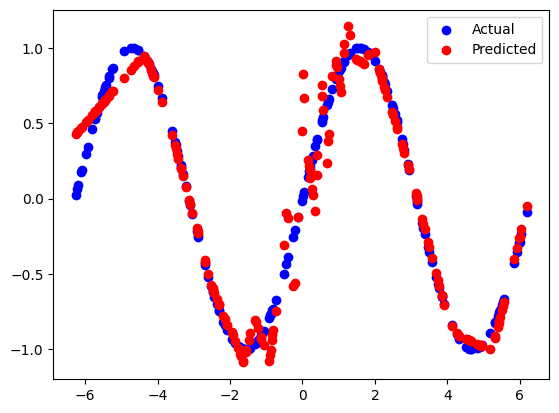

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x_test, y_test, c='b', label='Actual')
plt.scatter(x_test, y_pred, c='r', label='Predicted')
plt.legend()
plt.show()